In [1]:
# 匯入資料
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras import models 
from keras import layers
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras import backend as K
from keras.layers import Dense, Activation, Flatten
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LinearRegression

datasetTrain = pd.read_csv('adult.data.csv')
datasetTest = pd.read_csv('adult.test.csv')

# 定義
def MAE(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

def MSE(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean() 

def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

# 預處理
fliter1 = (datasetTrain["country"] != ' ?')
fliter2 = (datasetTrain["occupation"] != ' ?')
fliter3 = (datasetTrain["workclass"] != ' ?')
datasetTrain2 = datasetTrain[fliter1 & fliter2 & fliter3]

In [2]:
# 資料數值化
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
datasetTrain2['workclass'] = labelencoder.fit_transform(datasetTrain2['workclass'])
datasetTrain2['education'] = labelencoder.fit_transform(datasetTrain2['education'])
datasetTrain2['marital-status'] = labelencoder.fit_transform(datasetTrain2['marital-status'])
datasetTrain2['occupation'] = labelencoder.fit_transform(datasetTrain2['occupation'])
datasetTrain2['relationship'] = labelencoder.fit_transform(datasetTrain2['relationship'])
datasetTrain2['race'] = labelencoder.fit_transform(datasetTrain2['race'])
datasetTrain2['sex'] = labelencoder.fit_transform(datasetTrain2['sex'])
datasetTrain2['country'] = labelencoder.fit_transform(datasetTrain2['country'])
datasetTrain2['income'] = labelencoder.fit_transform(datasetTrain2['income'])
datasetTrain2

<ipython-input-2-d345d00e2f26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrain2['workclass'] = labelencoder.fit_transform(datasetTrain2['workclass'])
<ipython-input-2-d345d00e2f26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTrain2['education'] = labelencoder.fit_transform(datasetTrain2['education'])
<ipython-input-2-d345d00e2f26>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [3]:
# 正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_1 = scaler.fit_transform(datasetTrain2)
dataset_2 = pd.DataFrame(dataset_1,columns=datasetTrain2.columns)
dataset_2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income
0,0.301370,0.833333,0.043338,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.95,0.0
1,0.452055,0.666667,0.047277,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.95,0.0
2,0.287671,0.333333,0.137244,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.95,0.0
3,0.493151,0.333333,0.150212,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.95,0.0
4,0.150685,0.333333,0.220703,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.136986,0.333333,0.165563,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.95,0.0
30158,0.315068,0.333333,0.095589,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,0.95,1.0
30159,0.561644,0.333333,0.093914,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.95,0.0
30160,0.068493,0.333333,0.127620,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.95,0.0


In [4]:
# 設定答案
dataset_target = dataset_2.pop('hours-per-week')
dataset_target.loc()[dataset_target == 0]=0.1
# 分割資料
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( dataset_2 , dataset_target , test_size = 0.2, random_state = 0)
X_train.to_csv("fgeygfyue.csv",index=False)

In [5]:
#建立Sequential物件
network = models.Sequential()
network.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(10, activation='relu'))
#輸出層，Sigmoid
network.add(layers.Dense(1))
network.add(Flatten())
network.compile(optimizer='sgd', loss='MAE',metrics=[tf.keras.metrics.mae,tf.keras.metrics.mape,tf.metrics.mse] )
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
_________________________________________________________________
flatten (Flatten)            (None, 1)                 0         
Total params: 1,189
Trainable params: 1,189
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = network.fit(X_train,Y_train,
epochs=50,
batch_size=50)

Epoch 1/50
483/483 [==============================] - 0s 590us/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 33.7084 - mean_squared_error: 0.0148
Epoch 2/50
483/483 [==============================] - 0s 672us/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 32.2563 - mean_squared_error: 0.0139
Epoch 3/50
483/483 [==============================] - 0s 550us/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 31.9790 - mean_squared_error: 0.0139
Epoch 4/50
483/483 [==============================] - 0s 563us/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 31.7897 - mean_squared_error: 0.0139
Epoch 5/50
483/483 [==============================] - 0s 573us/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 31.6700 - mean_squared_error: 0.0139
Epoch 6/50
483/483 [==============================] - 0s 604us/step - loss: 0.07

483/483 [==============================] - 0s 610us/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 31.2614 - mean_squared_error: 0.0138
Epoch 46/50
483/483 [==============================] - 0s 589us/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 31.2910 - mean_squared_error: 0.0138
Epoch 47/50
483/483 [==============================] - 0s 532us/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 31.2850 - mean_squared_error: 0.0138
Epoch 48/50
483/483 [==============================] - 0s 571us/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 31.2827 - mean_squared_error: 0.0138
Epoch 49/50
483/483 [==============================] - 0s 585us/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 31.2538 - mean_squared_error: 0.0138
Epoch 50/50
483/483 [==============================] - 0s 566us/step - loss: 0.0730 - m

# 測試

In [7]:
# 匯入adult.test做測試
datasetTest = pd.read_csv('adult.test.csv')
fliter1 = (datasetTest["country"] != ' ?')
fliter2 = (datasetTest["occupation"] != ' ?')
fliter3 = (datasetTest["workclass"] != ' ?')
datasetTest2 = datasetTest[fliter1 & fliter2 & fliter3]

In [8]:
# 資料數值化
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
datasetTest2['workclass'] = labelencoder.fit_transform(datasetTest2['workclass'])
datasetTest2['education'] = labelencoder.fit_transform(datasetTest2['education'])
datasetTest2['marital-status'] = labelencoder.fit_transform(datasetTest2['marital-status'])
datasetTest2['occupation'] = labelencoder.fit_transform(datasetTest2['occupation'])
datasetTest2['relationship'] = labelencoder.fit_transform(datasetTest2['relationship'])
datasetTest2['race'] = labelencoder.fit_transform(datasetTest2['race'])
datasetTest2['sex'] = labelencoder.fit_transform(datasetTest2['sex'])
datasetTest2['country'] = labelencoder.fit_transform(datasetTest2['country'])
datasetTest2['income'] = labelencoder.fit_transform(datasetTest2['income'])
datasetTest2

<ipython-input-8-e096b4b273b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTest2['workclass'] = labelencoder.fit_transform(datasetTest2['workclass'])
<ipython-input-8-e096b4b273b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasetTest2['education'] = labelencoder.fit_transform(datasetTest2['education'])
<ipython-input-8-e096b4b273b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,2,245211,9,13,4,9,3,4,1,0,0,40,37,0
16276,39,2,215419,9,13,0,9,1,4,0,0,0,36,37,0
16278,38,2,374983,9,13,2,9,0,4,1,0,0,50,37,0
16279,44,2,83891,9,13,0,0,3,1,1,5455,0,40,37,0


In [9]:
# 正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_1 = scaler.fit_transform(datasetTrain2)
dataset_2 = pd.DataFrame(dataset_1,columns=datasetTrain2.columns)

In [10]:
Testdata = dataset_2.drop("hours-per-week",1)
Truedata = dataset_2["hours-per-week"]
Y_predicted = network.predict(Testdata)

In [11]:
Truedata

0        0.397959
1        0.122449
2        0.397959
3        0.397959
4        0.397959
           ...   
30157    0.377551
30158    0.397959
30159    0.397959
30160    0.193878
30161    0.397959
Name: hours-per-week, Length: 30162, dtype: float64

In [12]:
AVRvalue = pd.DataFrame(Truedata).mean()
Truedata.loc()[Truedata == 0] = AVRvalue[0]

In [13]:
history = network.fit(Testdata,Truedata
                      ,epochs=50
                      ,batch_size=50)

Epoch 1/50
604/604 [==============================] - 0s 581us/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 31.3389 - mean_squared_error: 0.0139
Epoch 2/50
604/604 [==============================] - 0s 597us/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 31.3135 - mean_squared_error: 0.0139
Epoch 3/50
604/604 [==============================] - 0s 567us/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 31.2801 - mean_squared_error: 0.0139
Epoch 4/50
604/604 [==============================] - 0s 561us/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 31.3109 - mean_squared_error: 0.0139
Epoch 5/50
604/604 [==============================] - 0s 539us/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 31.3030 - mean_squared_error: 0.0139
Epoch 6/50
604/604 [==============================] - 0s 599us/step - loss: 0.07

604/604 [==============================] - 0s 603us/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 31.1819 - mean_squared_error: 0.0138
Epoch 46/50
604/604 [==============================] - 0s 581us/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 31.1662 - mean_squared_error: 0.0138
Epoch 47/50
604/604 [==============================] - 0s 686us/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 31.1705 - mean_squared_error: 0.0138
Epoch 48/50
604/604 [==============================] - 0s 653us/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 31.1721 - mean_squared_error: 0.0138
Epoch 49/50
604/604 [==============================] - 0s 615us/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 31.1666 - mean_squared_error: 0.0138
Epoch 50/50
604/604 [==============================] - 0s 733us/step - loss: 0.0727 - m

In [14]:
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_absolute_percentage_error #MAPE
mse = mean_squared_error(Truedata, Y_predicted)
mae = mean_absolute_error(Truedata, Y_predicted)
mape=mean_absolute_percentage_error(Truedata, Y_predicted)

In [15]:
print(mse,
     mae,
     mape)

0.01393757474306556 0.07309398507985683 0.3103230652037647


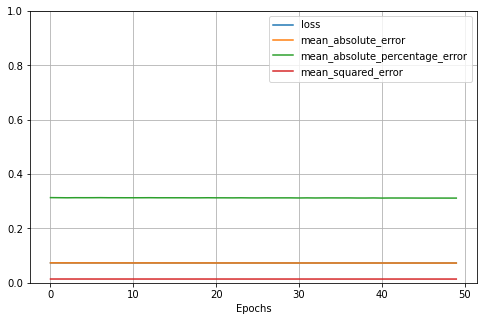

In [16]:
#輸出圖表
history.history['mean_absolute_percentage_error']=list(map(lambda x:x/100, history.history['mean_absolute_percentage_error']))
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel("Epochs")
plt.show()